In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Creacion de dataframe de demandad e energía
energia = pd.DataFrame()
years = range(2007,2024)

for year in years:
    url = f"https://raw.githubusercontent.com/adeulofeu/TFM/refs/heads/main/data/Demanda_Energia_SIN_{year}.xlsx"
    
    energia_temp = pd.read_excel(url,skiprows=2,header=1,engine='openpyxl')
    energia = pd.concat([energia,energia_temp])

In [3]:
# Información general del dataframe
print(energia.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6208 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fecha                    6208 non-null   object 
 1   Demanda Energia SIN kWh  6208 non-null   float64
 2   Generación kWh           6208 non-null   float64
 3   Demanda No Atendida kWh  5721 non-null   float64
 4   Exportaciones kWh        5745 non-null   float64
 5   Importaciones kWh        4959 non-null   float64
dtypes: float64(5), object(1)
memory usage: 339.5+ KB
None


In [4]:
# Cambio de tipo de variable a datetime64[ns] del atributo "Fecha"
energia["Fecha"] = pd.to_datetime(
    energia["Fecha"], 
    format="%Y-%m-%d",  # Especifica el formato deseado
    errors="coerce"     # Convierte valores inválidos en NaT
)

In [5]:
# Revisar si hay valores nulos
energia.isnull().sum()

Fecha                         0
Demanda Energia SIN kWh       0
Generación kWh                0
Demanda No Atendida kWh     487
Exportaciones kWh           463
Importaciones kWh          1249
dtype: int64

In [6]:
# Descripción estadística básica de los datos
energia.describe()

,Fecha,Demanda Energia SIN kWh,Generación kWh,Demanda No Atendida kWh,Exportaciones kWh,Importaciones kWh
count,6208,6.208000e+03,6.208000e+03,5.721000e+03,5.745000e+03,4.959000e+03
mean,2015-07-01 23:17:47.010309120,1.771210e+08,1.779812e+08,1.620205e+05,2.008593e+06,1.063098e+06
min,2007-01-01 00:00:00,1.098662e+08,1.111759e+08,1.000000e+03,3.000000e+01,6.000000e-02
25%,2011-04-01 18:00:00,1.571382e+08,1.595875e+08,2.903000e+04,8.859390e+03,4.246705e+03
50%,2015-07-01 12:00:00,1.766982e+08,1.779259e+08,7.547000e+04,6.828579e+05,2.387018e+04
75%,2019-10-01 06:00:00,1.952696e+08,1.940941e+08,1.813200e+05,3.143390e+06,6.197544e+05
max,2023-12-31 00:00:00,2.408332e+08,2.504391e+08,1.720827e+07,3.505239e+07,1.091103e+07
std,NaN,2.518140e+07,2.441339e+07,3.558010e+05,2.966301e+06,2.192694e+06


In [7]:
energia["year"] = energia["Fecha"].dt.year
energia["month"] = energia["Fecha"].dt.month
energia['day'] = energia['Fecha'].dt.day

In [8]:
# Creacion de dataframe de poblacion
url ="""https://raw.githubusercontent.com/adeulofeu/TFM/refs/heads/main/data/Poblaci%C3%B3n.csv"""
poblacion = pd.read_csv(url)

In [9]:
# Información general del dataframe
print(poblacion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Periodo(AAAA)  74 non-null     object
 1   Población      74 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
None


In [10]:
# Cambio de tipo de variable a datetime64[ns] del atributo "Fecha"
poblacion["Periodo(AAAA)"] = poblacion["Periodo(AAAA)"].astype('datetime64[ns]')

In [11]:
# Revisar si hay valores nulos
poblacion.isnull().sum()

Periodo(AAAA)    0
Población        0
dtype: int64

In [12]:
# Descripción estadística básica de los datos
poblacion.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Periodo(AAAA),74,1987-07-01 17:50:16.216216192,1950-12-31 00:00:00,1969-04-01 06:00:00,1987-07-01 12:00:00,2005-09-30 18:00:00,2023-12-31 00:00:00,NaN
Población,74.0,31697641.864865,13570943.0,21889817.5,31265472.0,41550931.75,52215503.0,11414523.86366


In [13]:
poblacion["year"] = poblacion["Periodo(AAAA)"].dt.year
poblacion["year"] = poblacion["year"].astype('int64')
poblacion = poblacion[poblacion["year"]>=2007]

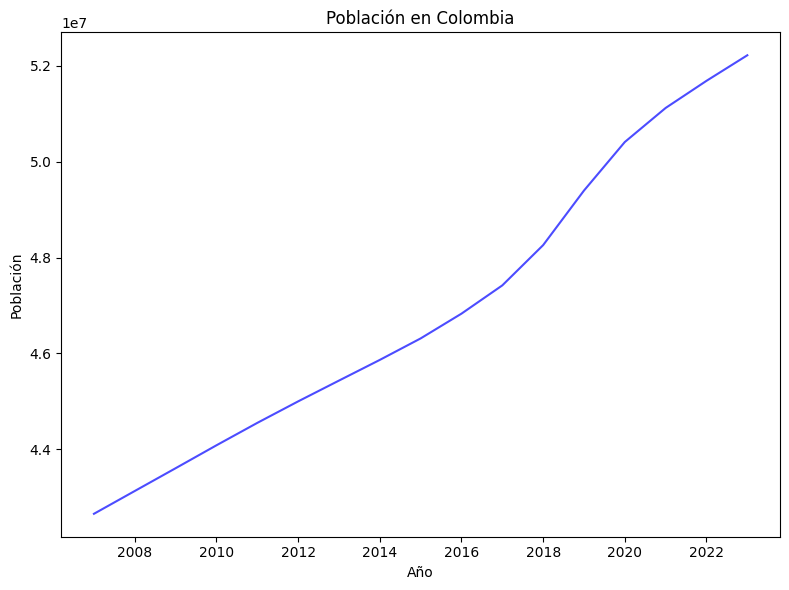

In [14]:
# Poblacion en Colombia
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(poblacion['year'],poblacion['Población'], color='blue', alpha=0.7)
axes.set_title('Población en Colombia')
axes.set_xlabel('Año')
axes.set_ylabel('Población')

plt.tight_layout()
plt.show()

In [15]:
# Creacion de dataframe de variables climaticas
url = """https://raw.githubusercontent.com/adeulofeu/TFM/refs/heads/main/data/Temperaturas_Dpto.csv"""
temperaturas = pd.read_csv(url)

In [16]:
# Información general del dataframe
print(temperaturas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FechaObservacion         6575 non-null   object 
 1   Temp_BOGOTA              6575 non-null   float64
 2   Temp_ANTIOQUIA           6575 non-null   float64
 3   Temp_VALLE DEL CAUCA     6575 non-null   float64
 4   Temp_ATLANTICO           6575 non-null   float64
 5   Temp_BOLIVAR             6575 non-null   float64
 6   Temp_CUNDINAMARCA        6575 non-null   float64
 7   Temp_NORTE DE SANTANDER  6575 non-null   float64
 8   Temp_SANTANDER           6575 non-null   float64
 9   Temp_CESAR               6575 non-null   float64
 10  Temp_META                6575 non-null   float64
 11  Año                      6575 non-null   int64  
 12  Mes                      6575 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 667.9+ KB
None


In [17]:
temperaturas["FechaObservacion"] = pd.to_datetime(
    temperaturas["FechaObservacion"], 
    format="%Y-%m-%d",  # Especifica el formato deseado
    errors="coerce"     # Convierte valores inválidos en NaT
)

In [18]:
# Revisar si hay valores nulos
temperaturas.isnull().sum()

FechaObservacion           0
Temp_BOGOTA                0
Temp_ANTIOQUIA             0
Temp_VALLE DEL CAUCA       0
Temp_ATLANTICO             0
Temp_BOLIVAR               0
Temp_CUNDINAMARCA          0
Temp_NORTE DE SANTANDER    0
Temp_SANTANDER             0
Temp_CESAR                 0
Temp_META                  0
Año                        0
Mes                        0
dtype: int64

In [19]:
# Descripción estadística básica de los datos
temperaturas.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
FechaObservacion,6575,2016-01-01 00:00:00,2007-01-01 00:00:00,2011-07-02 12:00:00,2016-01-01 00:00:00,2020-07-01 12:00:00,2024-12-31 00:00:00,NaN
Temp_BOGOTA,6575.0,14.476603,0.0,13.907672,14.489313,15.070186,20.362486,1.162636
Temp_ANTIOQUIA,6575.0,19.876256,9.546667,18.854889,19.877372,20.951518,28.287257,1.622827
Temp_VALLE DEL CAUCA,6575.0,20.648041,0.0,19.260577,20.949739,22.326977,34.0,2.883373
Temp_ATLANTICO,6575.0,27.266034,0.0,27.083333,27.941667,28.719031,34.1,4.112468
Temp_BOLIVAR,6575.0,27.932242,20.885714,27.2,28.108081,28.638246,32.9,1.269629
Temp_CUNDINAMARCA,6575.0,15.60049,9.714634,14.310864,15.351145,16.536359,30.541667,1.917811
Temp_NORTE DE SANTANDER,6575.0,21.617885,0.0,19.438133,21.031944,23.769444,32.65,3.803008
Temp_SANTANDER,6575.0,18.190112,4.79375,17.172459,18.743617,19.886194,34.716667,2.98608
Temp_CESAR,6575.0,25.104038,13.566667,22.919897,24.648611,27.145201,34.65,2.850297


In [20]:
cols = temperaturas.columns[temperaturas.columns.str.startswith('Temp_')]
#cols = cols

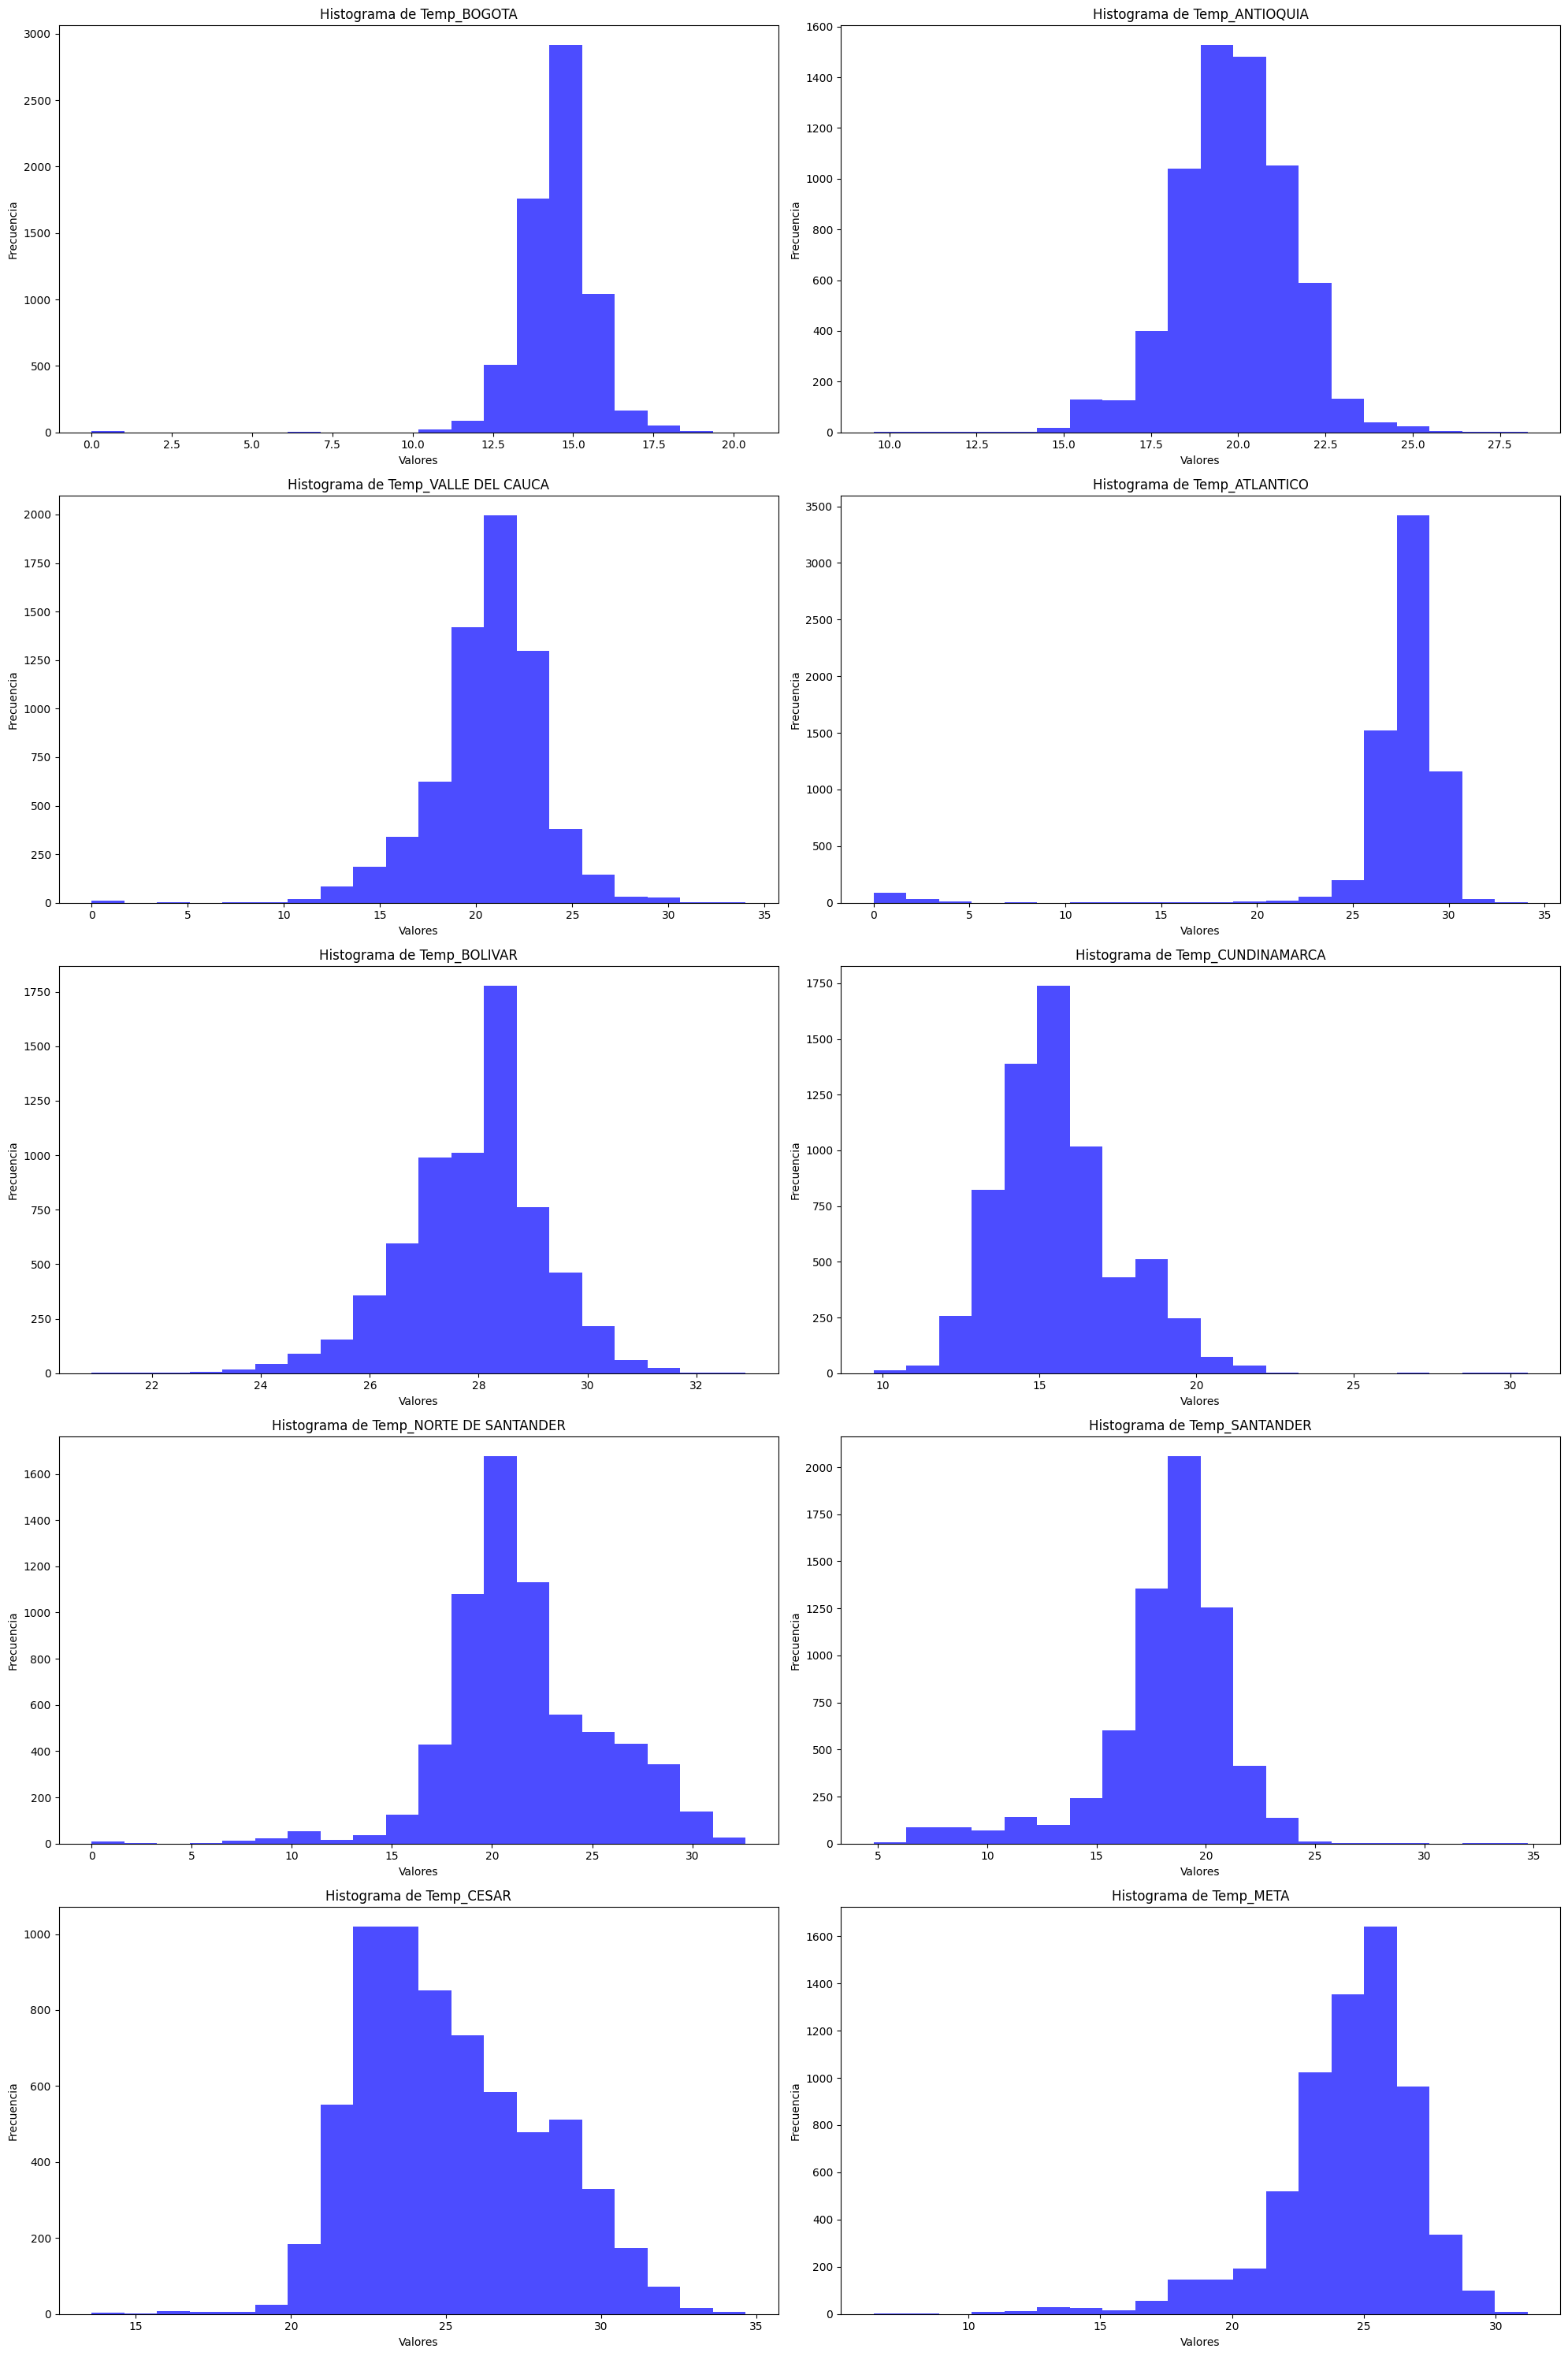

In [21]:
# Configurar el tamaño de la figura
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
axes = axes.flatten()
i = 0
for col in cols:
    axes[i].hist(temperaturas[col].dropna(), bins=20, color='blue', alpha=0.7)
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frecuencia')
    i +=1

plt.tight_layout()
plt.show()

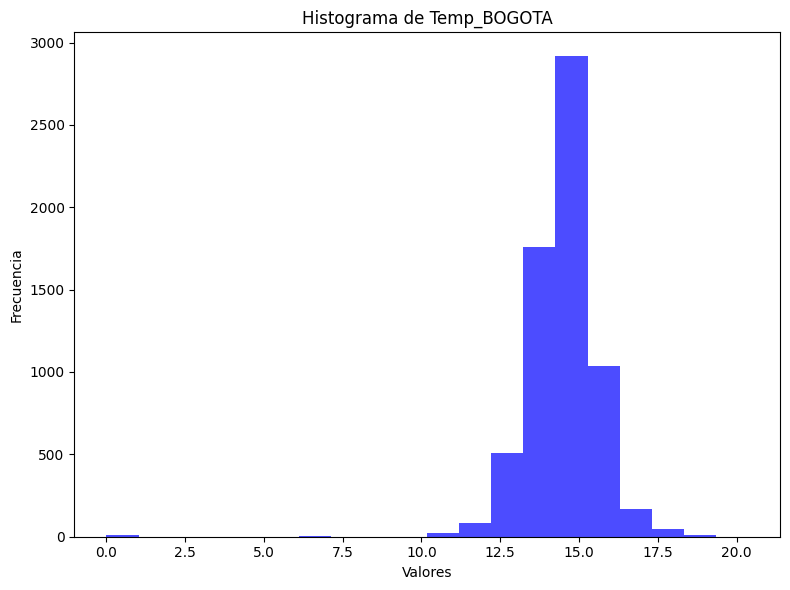

In [22]:
# Temperatura de Bogota
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_BOGOTA'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_BOGOTA'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

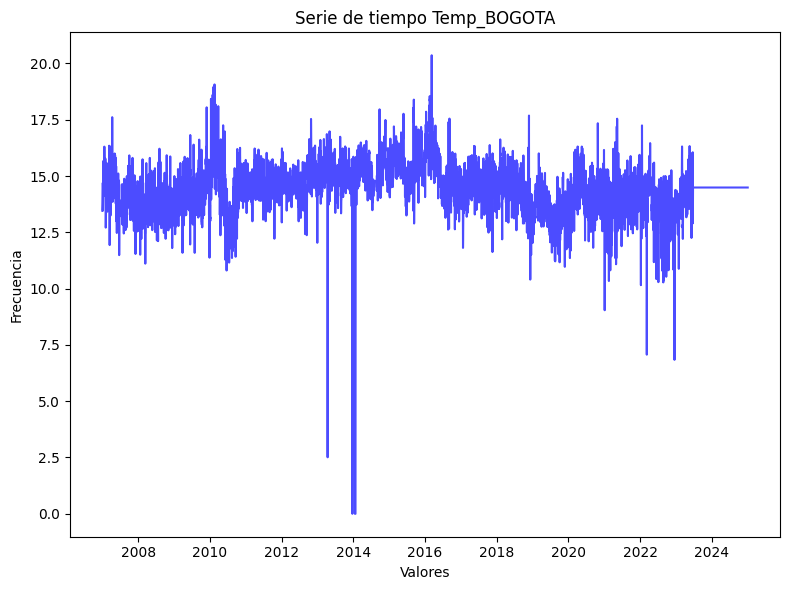

In [23]:
# Temperatura de Bogota
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_BOGOTA'], label='Temp_BOGOTA', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'Temp_BOGOTA'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

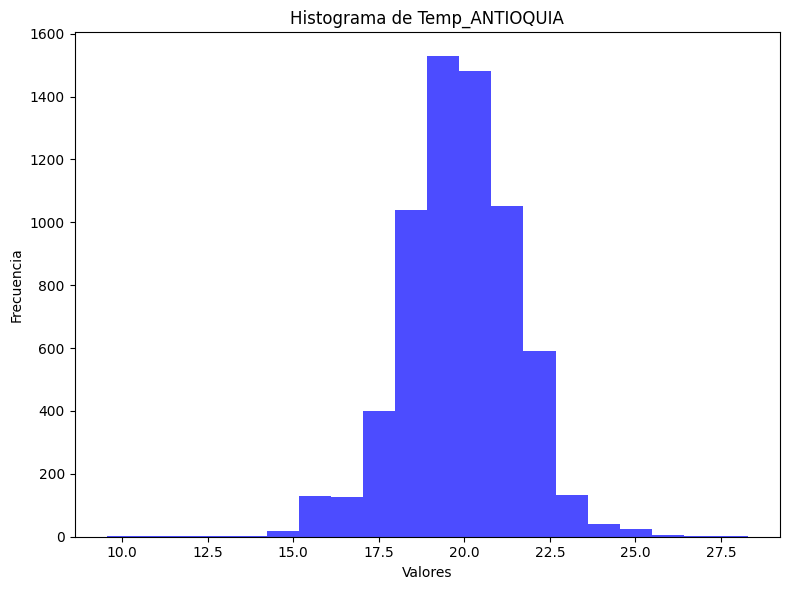

In [24]:
# Temperatura de Antioquia
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_ANTIOQUIA'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_ANTIOQUIA'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

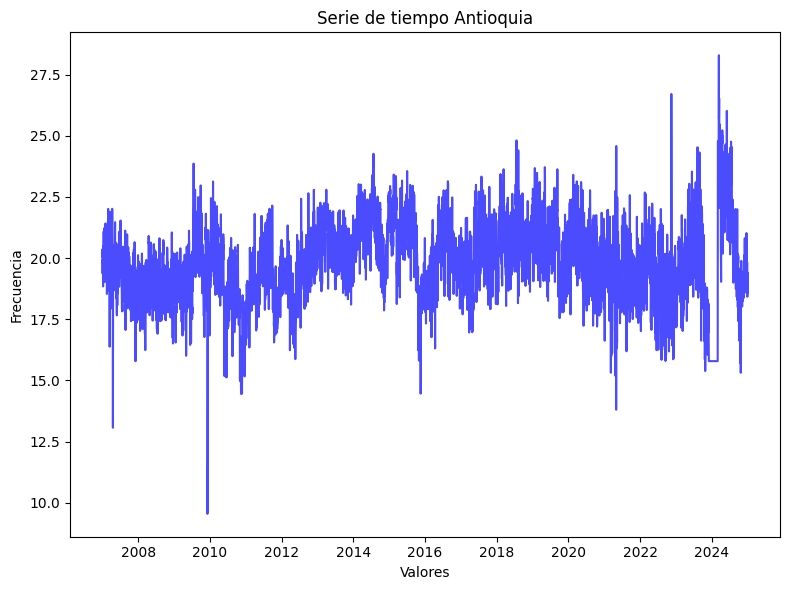

In [25]:
# Temperatura de Antioquia
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_ANTIOQUIA'], label='Temp_ANTIOQUIA', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'Antioquia'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

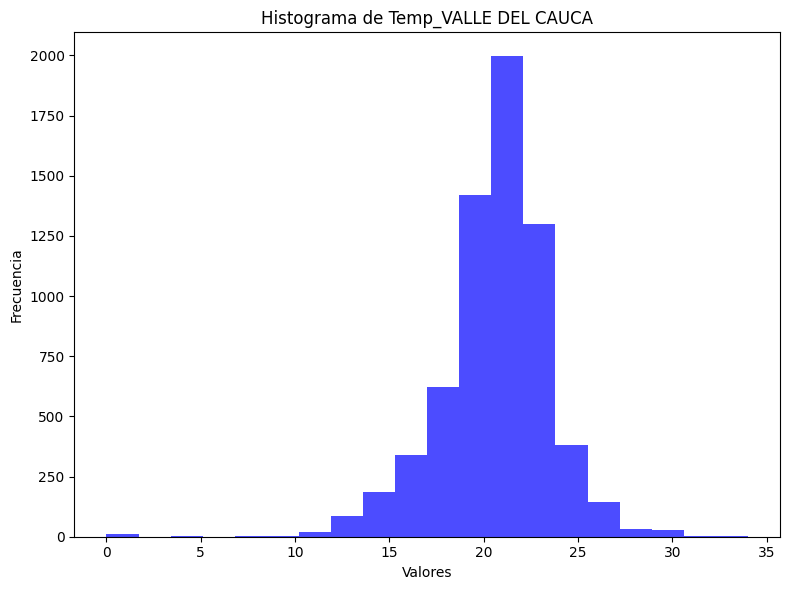

In [26]:
# Temperatura de Valle de Cauca
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_VALLE DEL CAUCA'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_VALLE DEL CAUCA'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

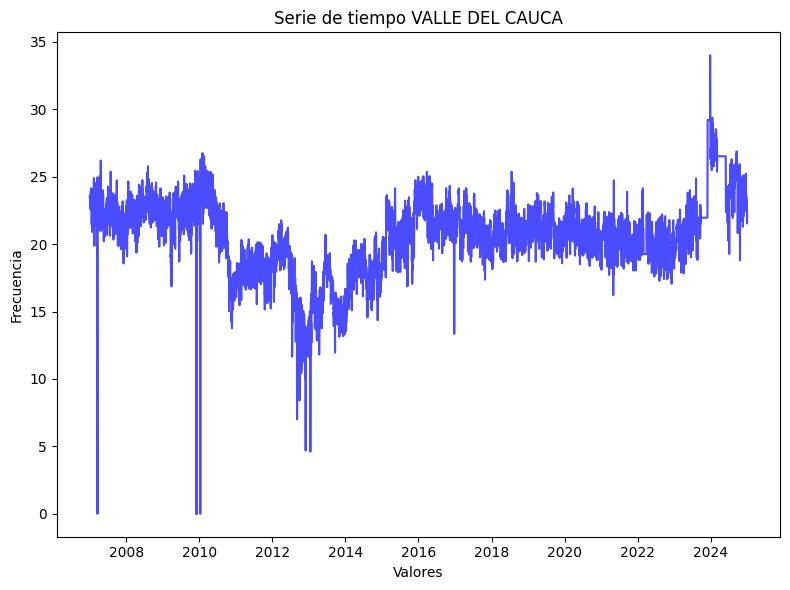

In [27]:
# Temperatura de VALLE DEL CAUCA
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_VALLE DEL CAUCA'], label='Temp_VALLE DEL CAUCA', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'VALLE DEL CAUCA'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

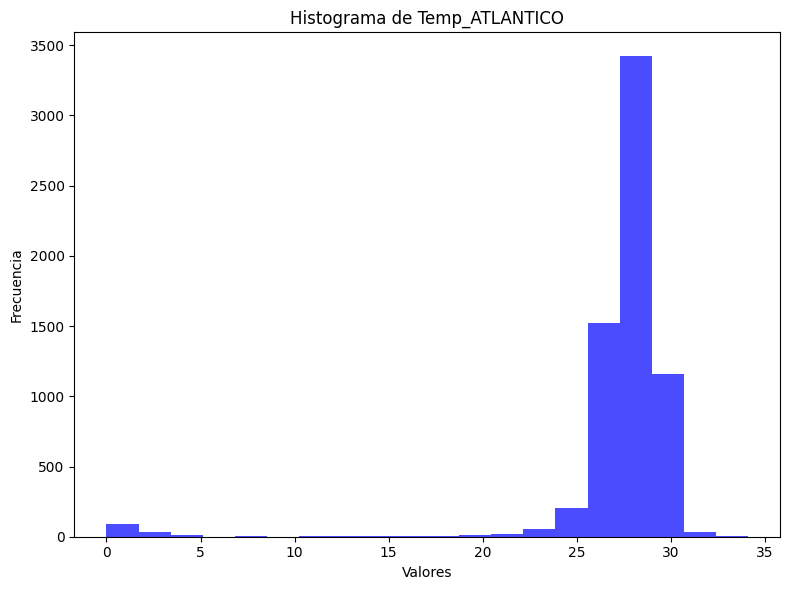

In [28]:
# Temperatura de Atlantico
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_ATLANTICO'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_ATLANTICO'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

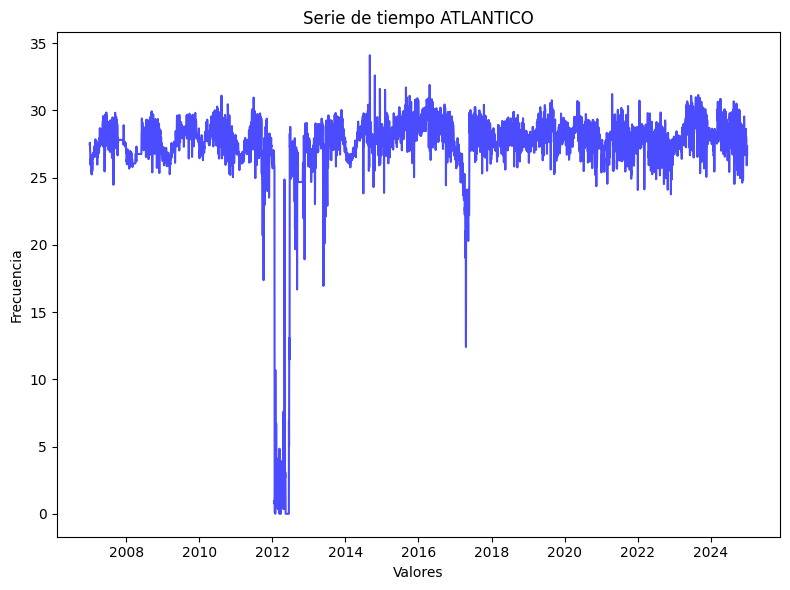

In [29]:
# Temperatura de ATLANTICO
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_ATLANTICO'], label='Temp_ATLANTICO', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'ATLANTICO'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

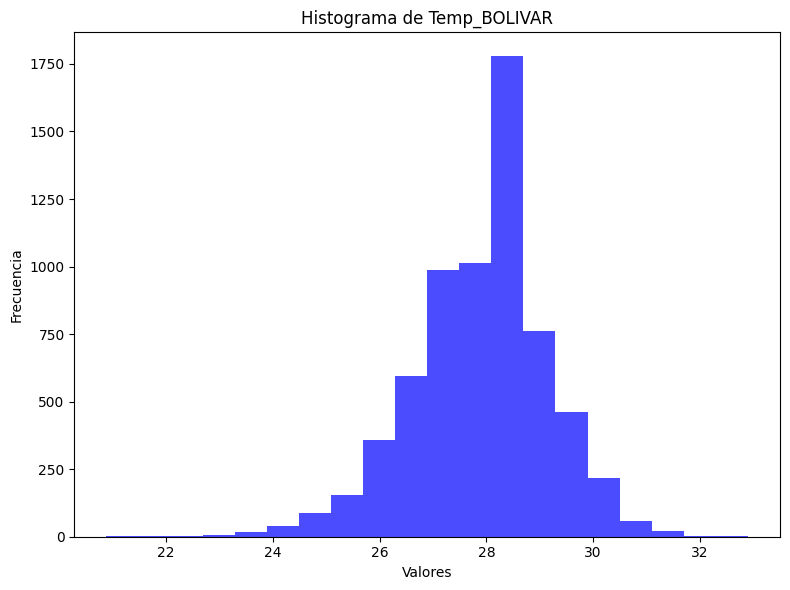

In [30]:
# Temperatura de Bolivar
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_BOLIVAR'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_BOLIVAR'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

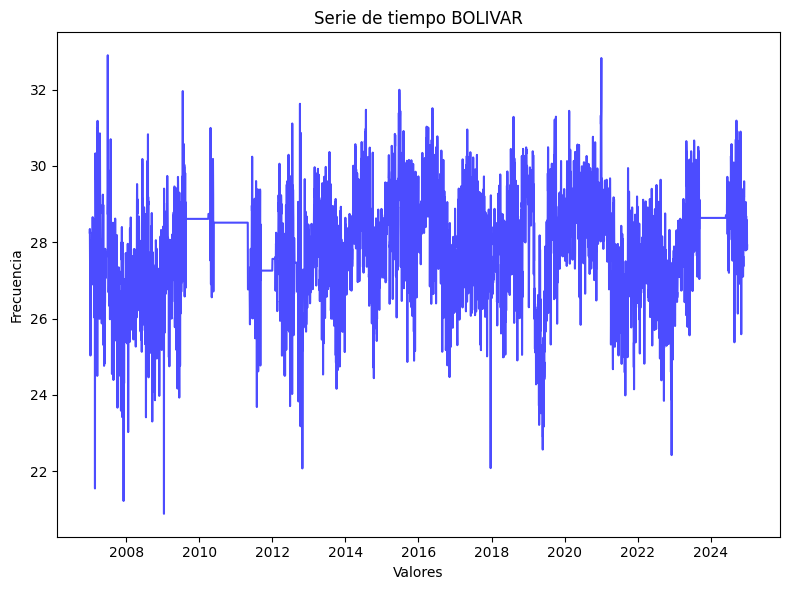

In [31]:
# Temperatura de BOLIVAR
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_BOLIVAR'], label='Temp_BOLIVAR', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'BOLIVAR'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

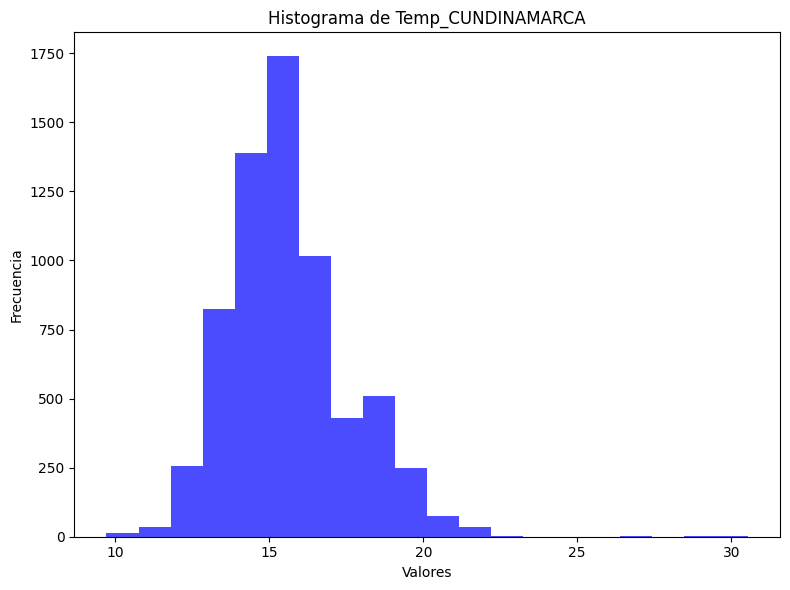

In [32]:
# Temperatura de Cundinamarca
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_CUNDINAMARCA'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_CUNDINAMARCA'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

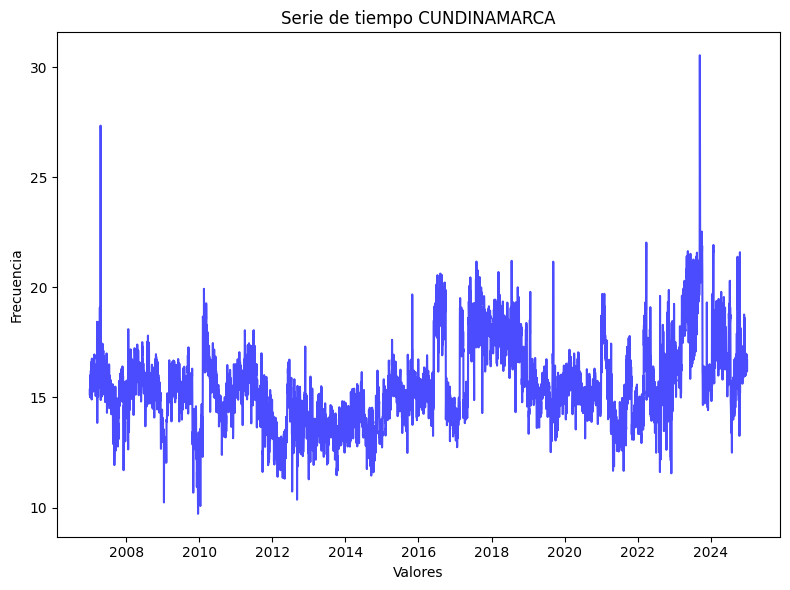

In [33]:
# Temperatura de CUNDINAMARCA
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_CUNDINAMARCA'], label='Temp_CUNDINAMARCA', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'CUNDINAMARCA'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

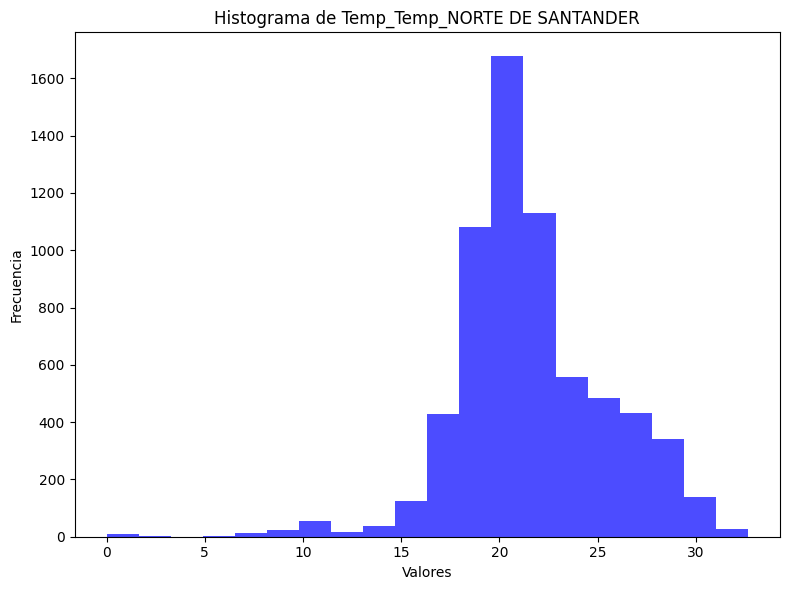

In [34]:
# Temperatura de NORTE DE SANTANDER
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_NORTE DE SANTANDER'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_Temp_NORTE DE SANTANDER'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

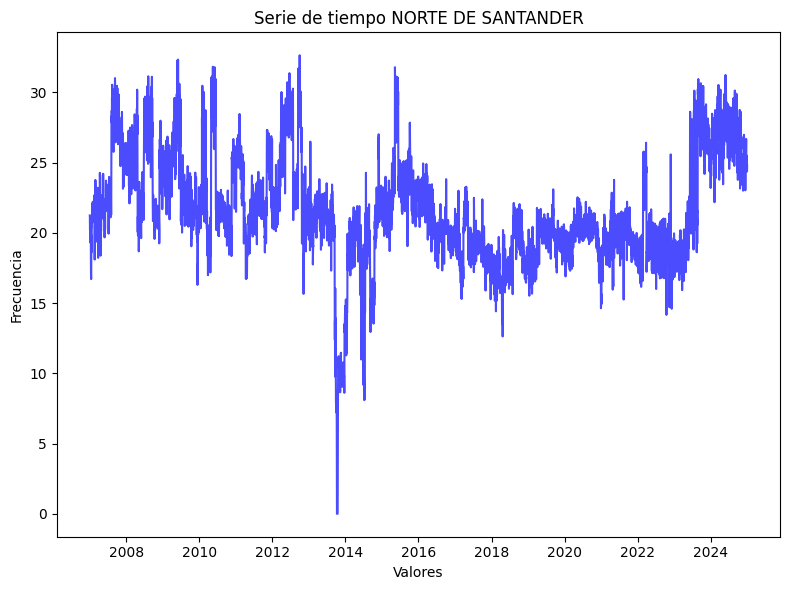

In [35]:
# Temperatura de NORTE DE SANTANDER
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_NORTE DE SANTANDER'], label='Temp_NORTE DE SANTANDER', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'NORTE DE SANTANDER'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

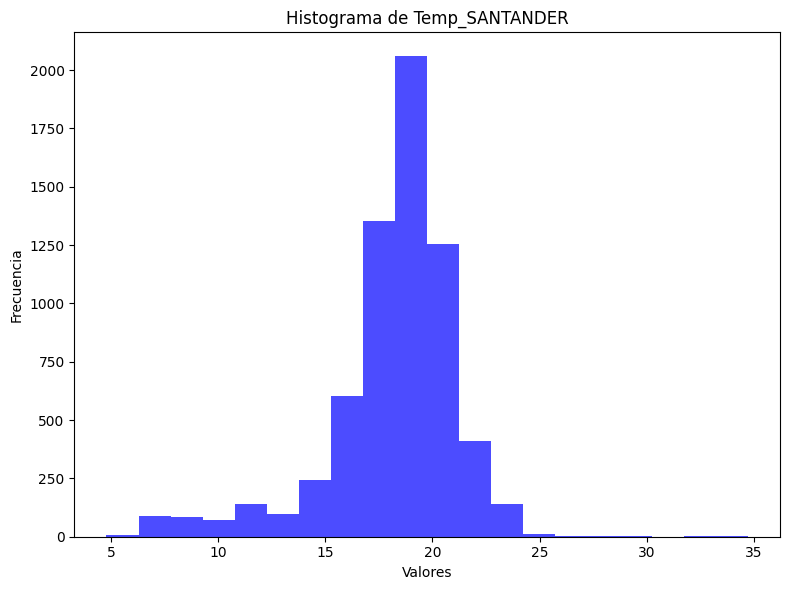

In [36]:
# Temperatura de SANTANDER
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_SANTANDER'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_SANTANDER'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

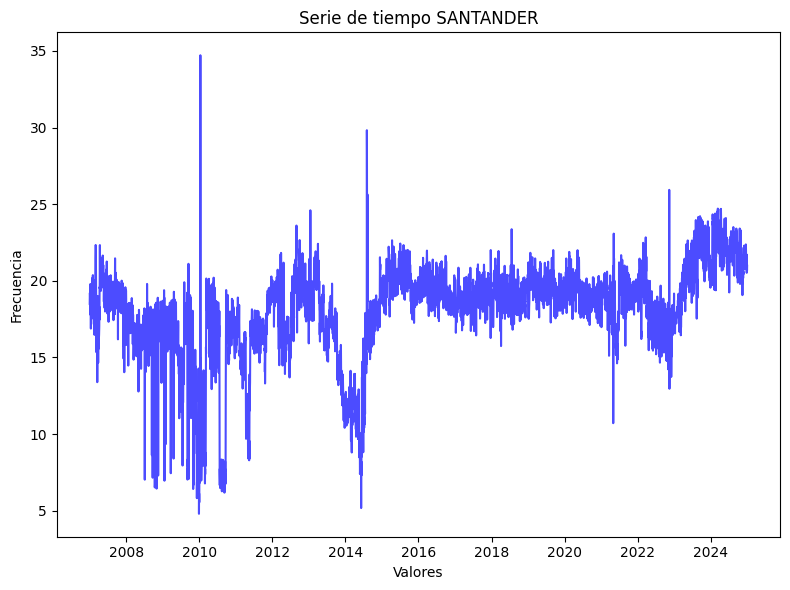

In [37]:
# Temperatura de NORTE DE SANTANDER
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_SANTANDER'], label='Temp_SANTANDER', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'SANTANDER'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

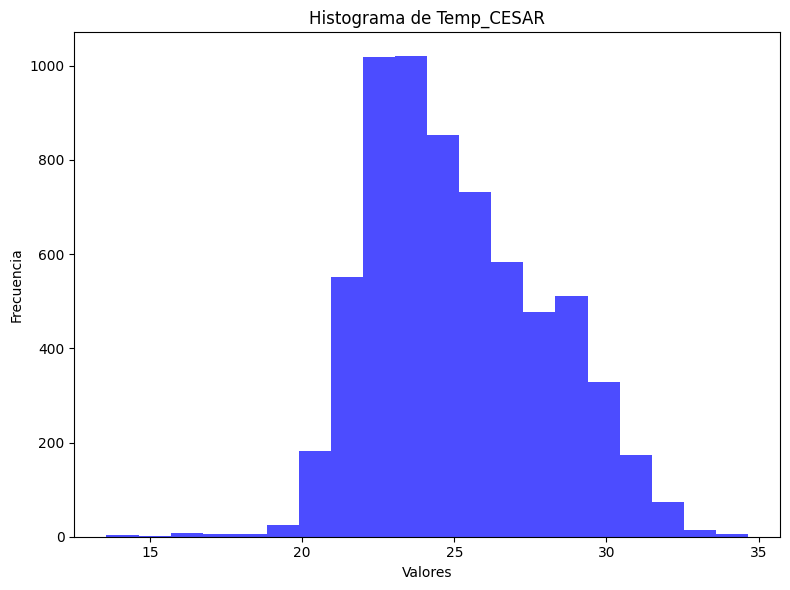

In [38]:
# Temperatura de Cesar
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_CESAR'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_CESAR'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

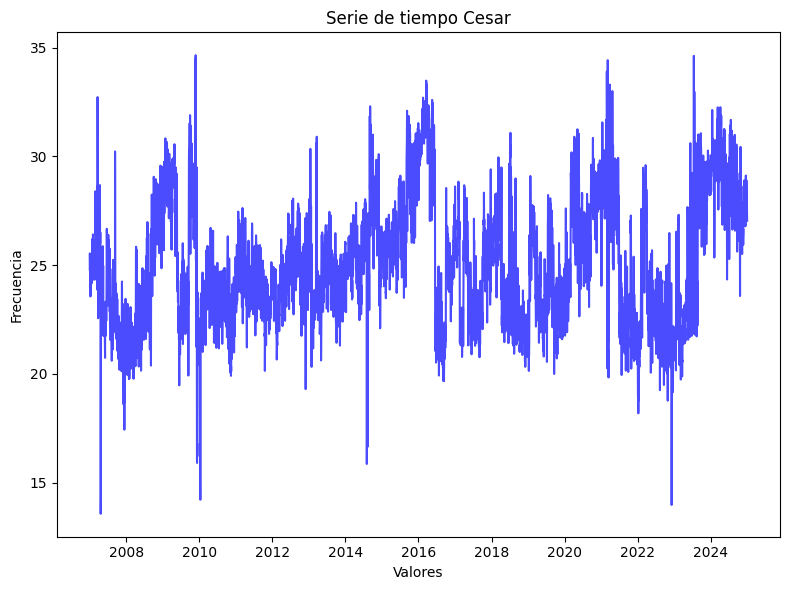

In [39]:
# Temperatura de Cesar
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_CESAR'], label='Temp_CESAR', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'Cesar'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

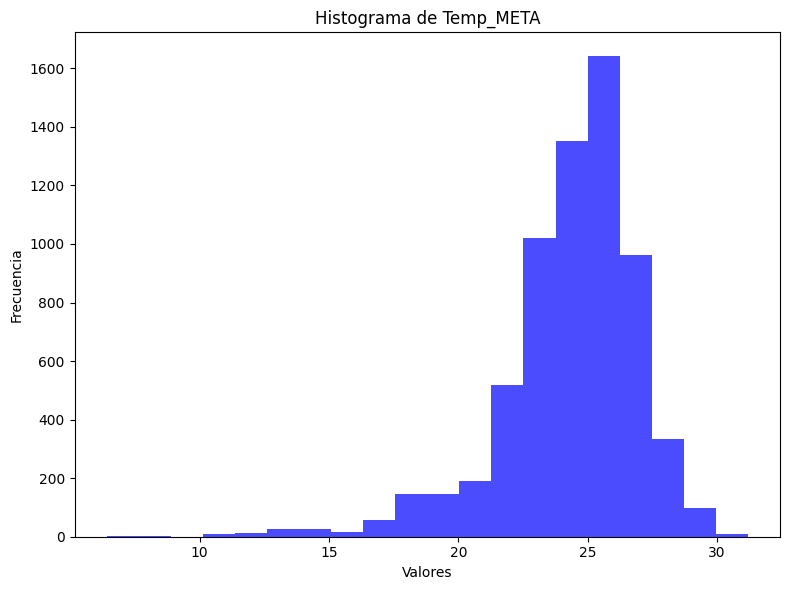

In [40]:
# Temperatura de Meta
fig, axes = plt.subplots(figsize=(8, 6))
axes.hist(temperaturas['Temp_META'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title(f'Histograma de {'Temp_META'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

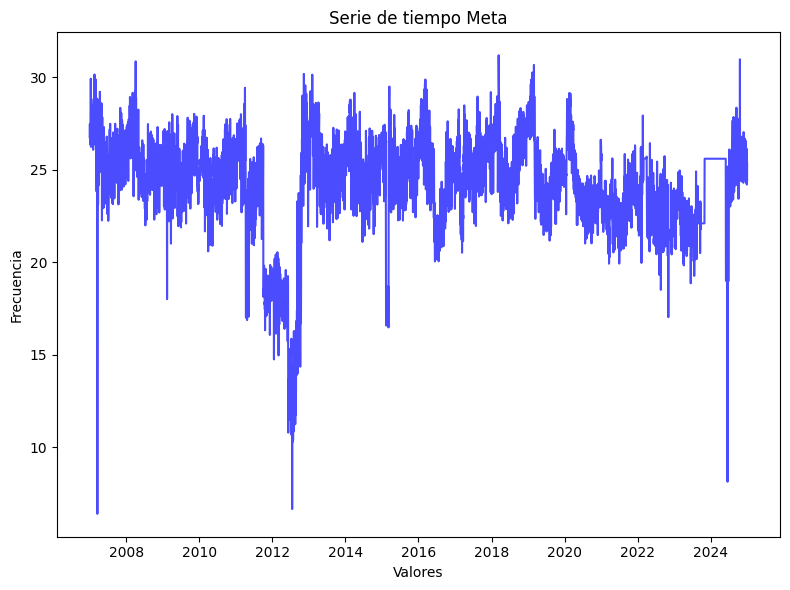

In [41]:
# Temperatura de Meta
fig, axes = plt.subplots(figsize=(8, 6))
axes.plot(temperaturas['FechaObservacion'], temperaturas['Temp_META'], label='Temp_META', color='blue', alpha=0.7)
axes.set_title(f'Serie de tiempo {'Meta'}')
axes.set_xlabel('Valores')
axes.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

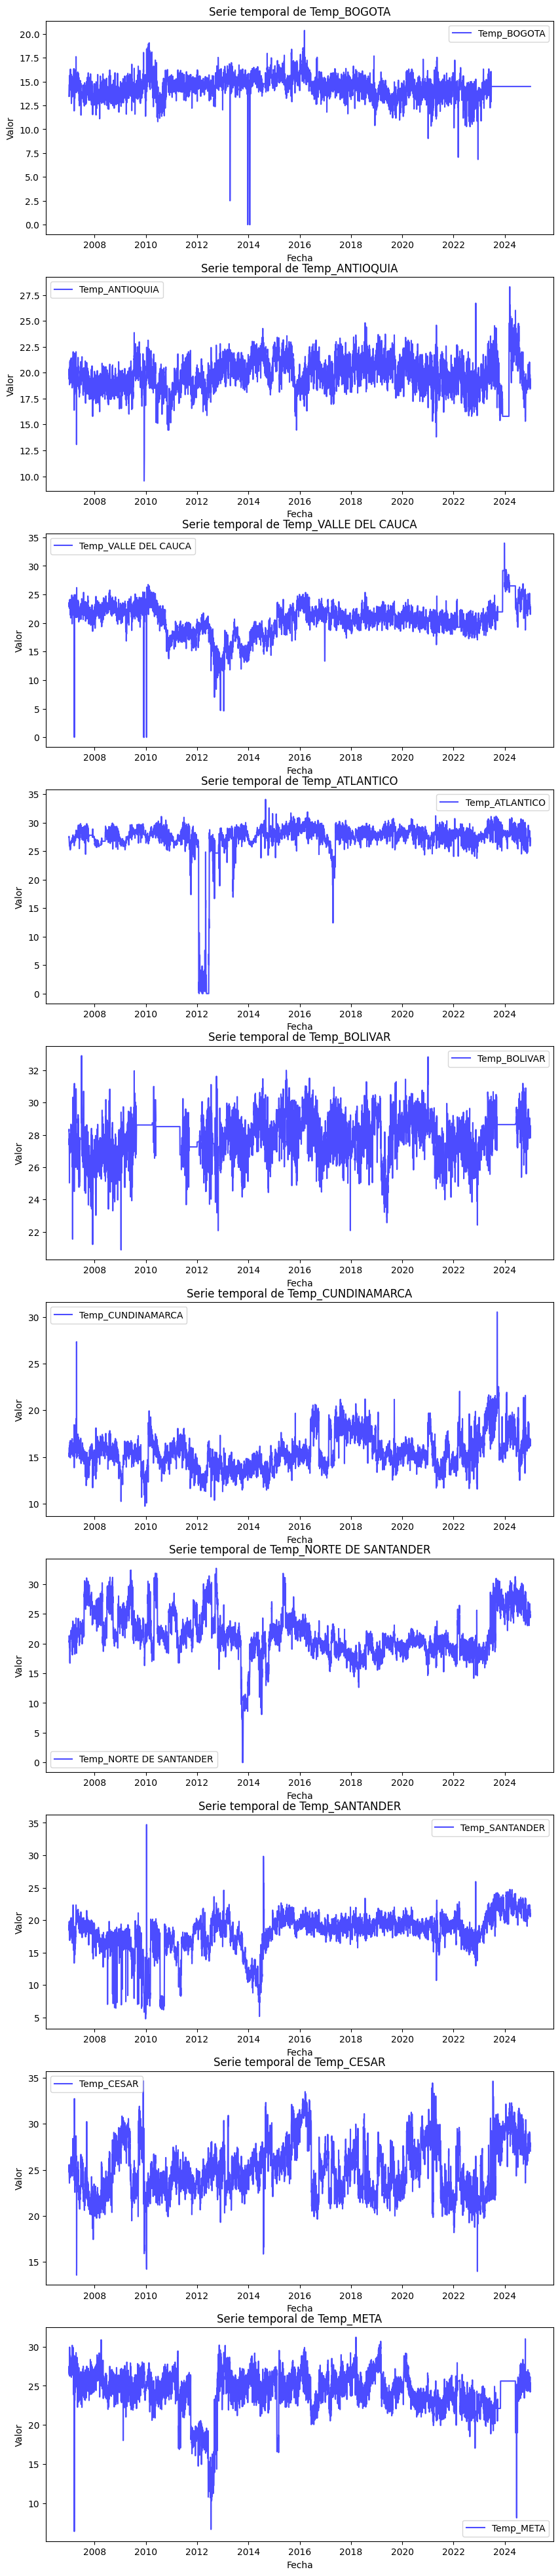

In [42]:
# Configurar el tamaño de la figura
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 50))
axes = axes.flatten()
i = 0

for col in cols:
        axes[i].plot(temperaturas['FechaObservacion'], temperaturas[col], label=col, color='blue', alpha=0.7)
        axes[i].set_title(f'Serie temporal de {col}')
        axes[i].set_xlabel('Fecha')
        axes[i].set_ylabel('Valor')
        axes[i].legend()
        i +=1

Combinación de Datasets

In [43]:
# Combianación de dataset de energía y población
dataset = energia.merge(poblacion,how="left",on="year")

dataset = dataset.drop(columns={"Periodo(AAAA)",'year','month','day'})

In [44]:
# Combianación de dataset de energía y temperatura
dataset = dataset.merge(temperaturas,how="left",left_on="Fecha",right_on="FechaObservacion")

In [45]:
dataset = dataset.drop(columns={"Año",'Mes','FechaObservacion'})

In [46]:
# Se guarda el dataset final para el modelo
dataset.to_csv("dataset_modelos.csv")

In [47]:
dataset.head(10)

,Fecha,Demanda Energia SIN kWh,Generación kWh,Demanda No Atendida kWh,Exportaciones kWh,Importaciones kWh,Población,Temp_BOGOTA,Temp_ANTIOQUIA,Temp_VALLE DEL CAUCA,Temp_ATLANTICO,Temp_BOLIVAR,Temp_CUNDINAMARCA,Temp_NORTE DE SANTANDER,Temp_SANTANDER,Temp_CESAR,Temp_META
0,2007-01-01,1.098662e+08,1.133512e+08,14410.0,3499392.00,NaN,42658630,13.458333,20.046262,23.500690,27.483333,28.254167,15.136742,21.241667,19.148125,24.793750,26.762500
1,2007-01-02,1.323110e+08,1.353954e+08,5910.0,3299095.66,208776.0,42658630,13.854167,20.144860,23.591034,27.595833,28.347826,15.391473,21.127143,18.432298,25.540426,27.483333
2,2007-01-03,1.388197e+08,1.421048e+08,10070.0,3295124.41,NaN,42658630,13.858333,20.355288,23.532168,27.345833,27.854167,15.301961,20.230556,18.647799,25.197872,26.754167
3,2007-01-04,1.405693e+08,1.439118e+08,19150.0,3361720.48,NaN,42658630,14.137500,19.365196,22.783333,27.125000,27.383333,15.016988,20.411429,19.040000,24.765957,26.987500
4,2007-01-05,1.410687e+08,1.442180e+08,161380.0,3310620.07,NaN,42658630,14.169565,19.649275,23.177778,26.595652,27.762500,15.871094,20.475000,19.773856,24.429167,26.429167
5,2007-01-06,1.345151e+08,1.377271e+08,14050.0,3226016.00,NaN,42658630,14.695455,19.953271,23.443448,26.462500,27.241667,16.010266,20.377778,18.913750,24.380435,27.229167
6,2007-01-07,1.207631e+08,1.241022e+08,13970.0,3353056.00,NaN,42658630,14.445833,19.746262,23.164336,26.304167,26.837500,15.180303,19.573611,18.886076,24.089583,26.633333
7,2007-01-08,1.203864e+08,1.236985e+08,3480.0,3315580.10,NaN,42658630,13.473913,19.851579,22.938168,26.066667,25.033333,15.262140,19.314493,17.779832,23.559091,26.362500
8,2007-01-09,1.395750e+08,1.426768e+08,227240.0,3329056.08,NaN,42658630,14.358333,18.839344,22.574436,25.937500,26.204762,15.012955,19.300000,18.393377,23.904167,27.072222
9,2007-01-10,1.417933e+08,1.444632e+08,508640.0,3316286.44,137808.0,42658630,14.550000,19.649215,23.135915,26.087500,28.057143,15.351145,20.000000,18.524204,24.322917,28.266667


EDA

In [48]:
# Para analisis de estacionalidad separamos la fecha en año, mes y dia
dataset['ano'] = pd.to_datetime(dataset['Fecha'], errors='coerce').dt.strftime('%Y')
dataset['mes'] = pd.to_datetime(dataset['Fecha'], errors='coerce').dt.strftime('%m')
dataset['dia'] = pd.to_datetime(dataset['Fecha'], errors='coerce').dt.strftime('%d')

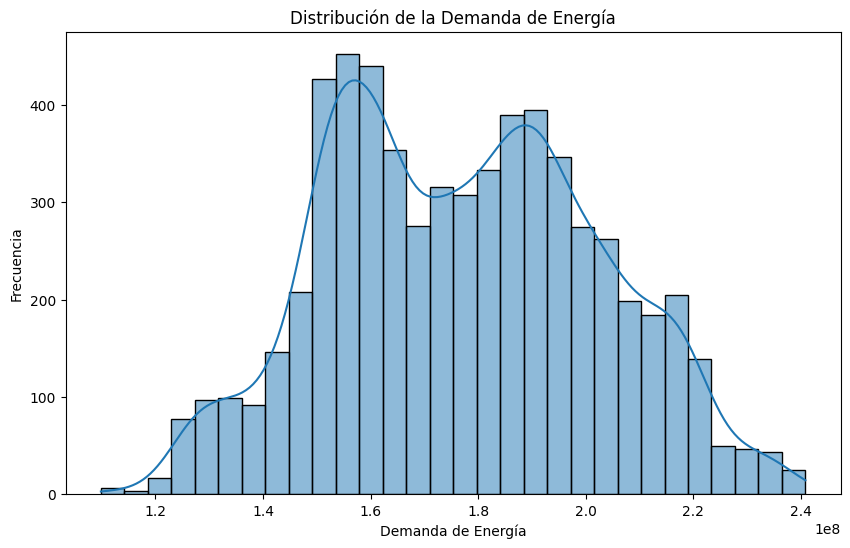

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(energia['Demanda Energia SIN kWh'], bins=30, kde=True)
plt.title('Distribución de la Demanda de Energía')
plt.xlabel('Demanda de Energía')
plt.ylabel('Frecuencia')
plt.show()

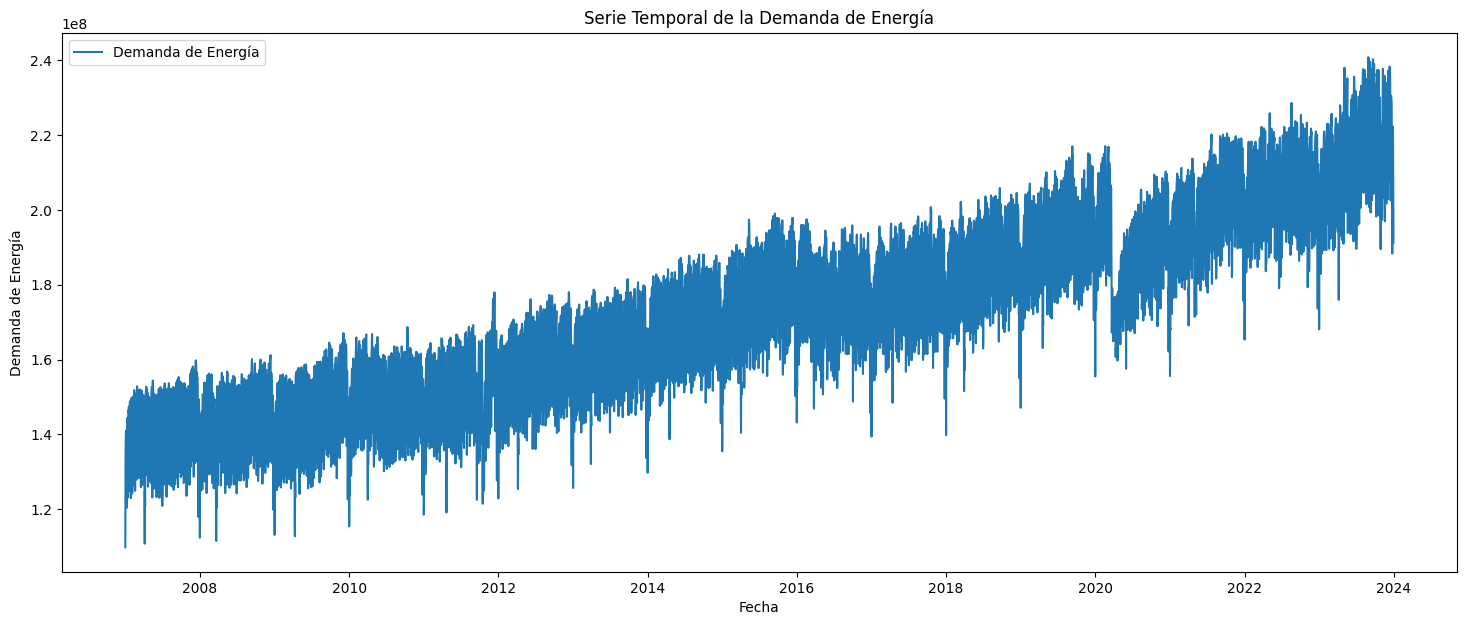

In [50]:
plt.figure(figsize=(18, 7))
plt.plot(energia['Fecha'], energia['Demanda Energia SIN kWh'], label='Demanda de Energía')
plt.title('Serie Temporal de la Demanda de Energía')
plt.xlabel('Fecha')
plt.ylabel('Demanda de Energía')
plt.legend()
plt.show()

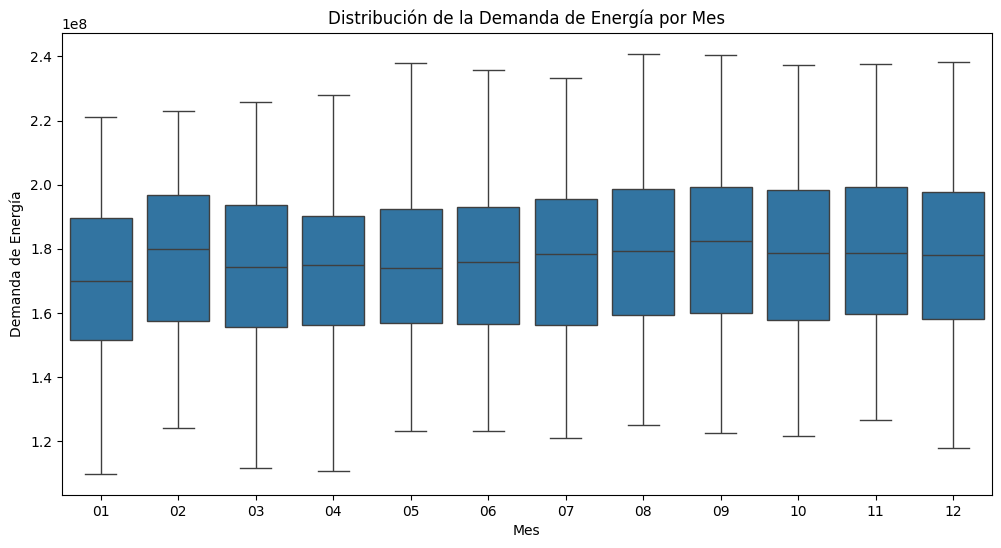

In [51]:
# Boxplot por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='Demanda Energia SIN kWh', data=dataset)
plt.title('Distribución de la Demanda de Energía por Mes')
plt.xlabel('Mes')
plt.ylabel('Demanda de Energía')
plt.show()

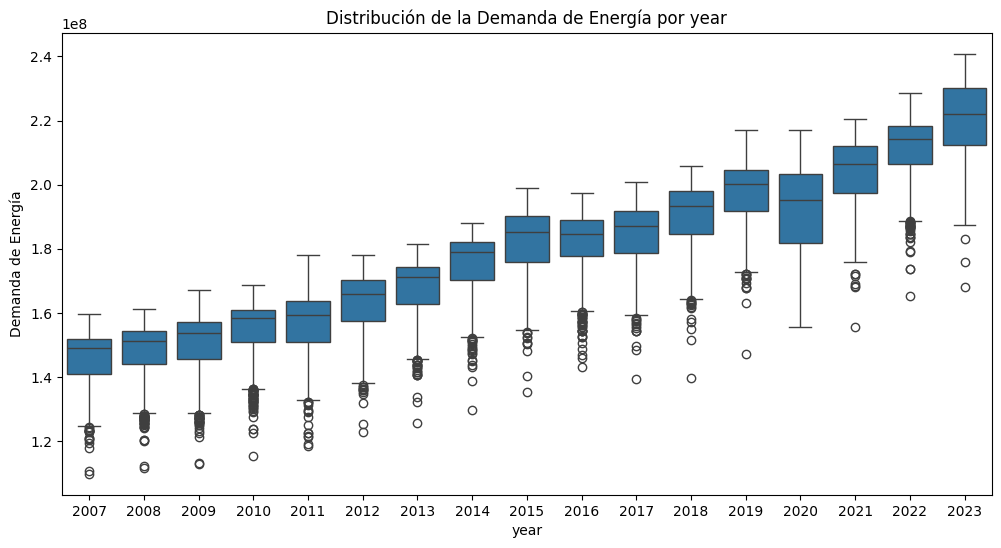

In [52]:
# Boxplot por year
plt.figure(figsize=(12, 6))
sns.boxplot(x='ano', y='Demanda Energia SIN kWh', data=dataset)
plt.title('Distribución de la Demanda de Energía por year')
plt.xlabel('year')
plt.ylabel('Demanda de Energía')
plt.show()

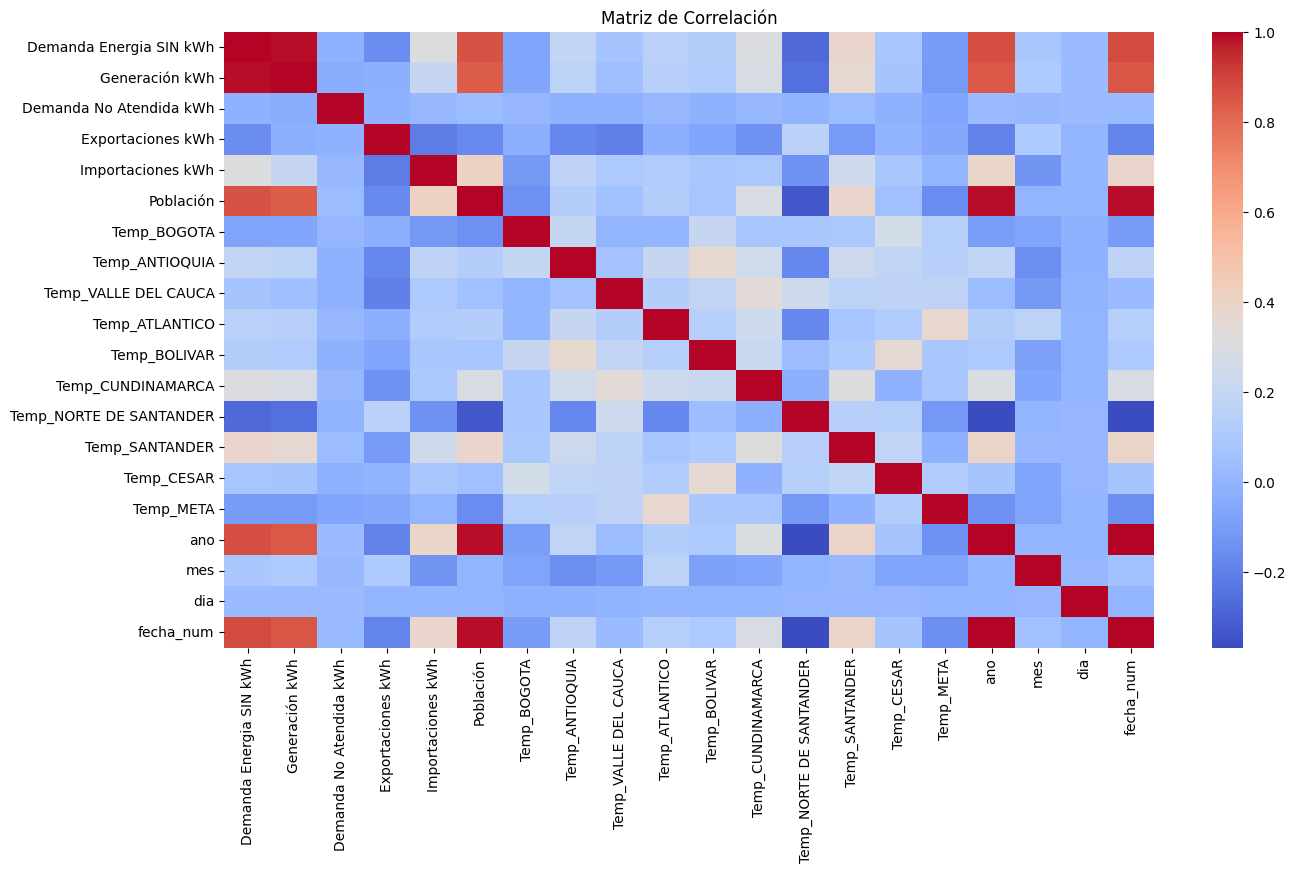

In [53]:
dataset["fecha_num"] = pd.to_datetime(dataset["Fecha"]).astype('int64') // 10**9  # En segundos
mstr = dataset.drop(columns={"Fecha"})
plt.figure(figsize=(15, 8))
sns.heatmap(mstr.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

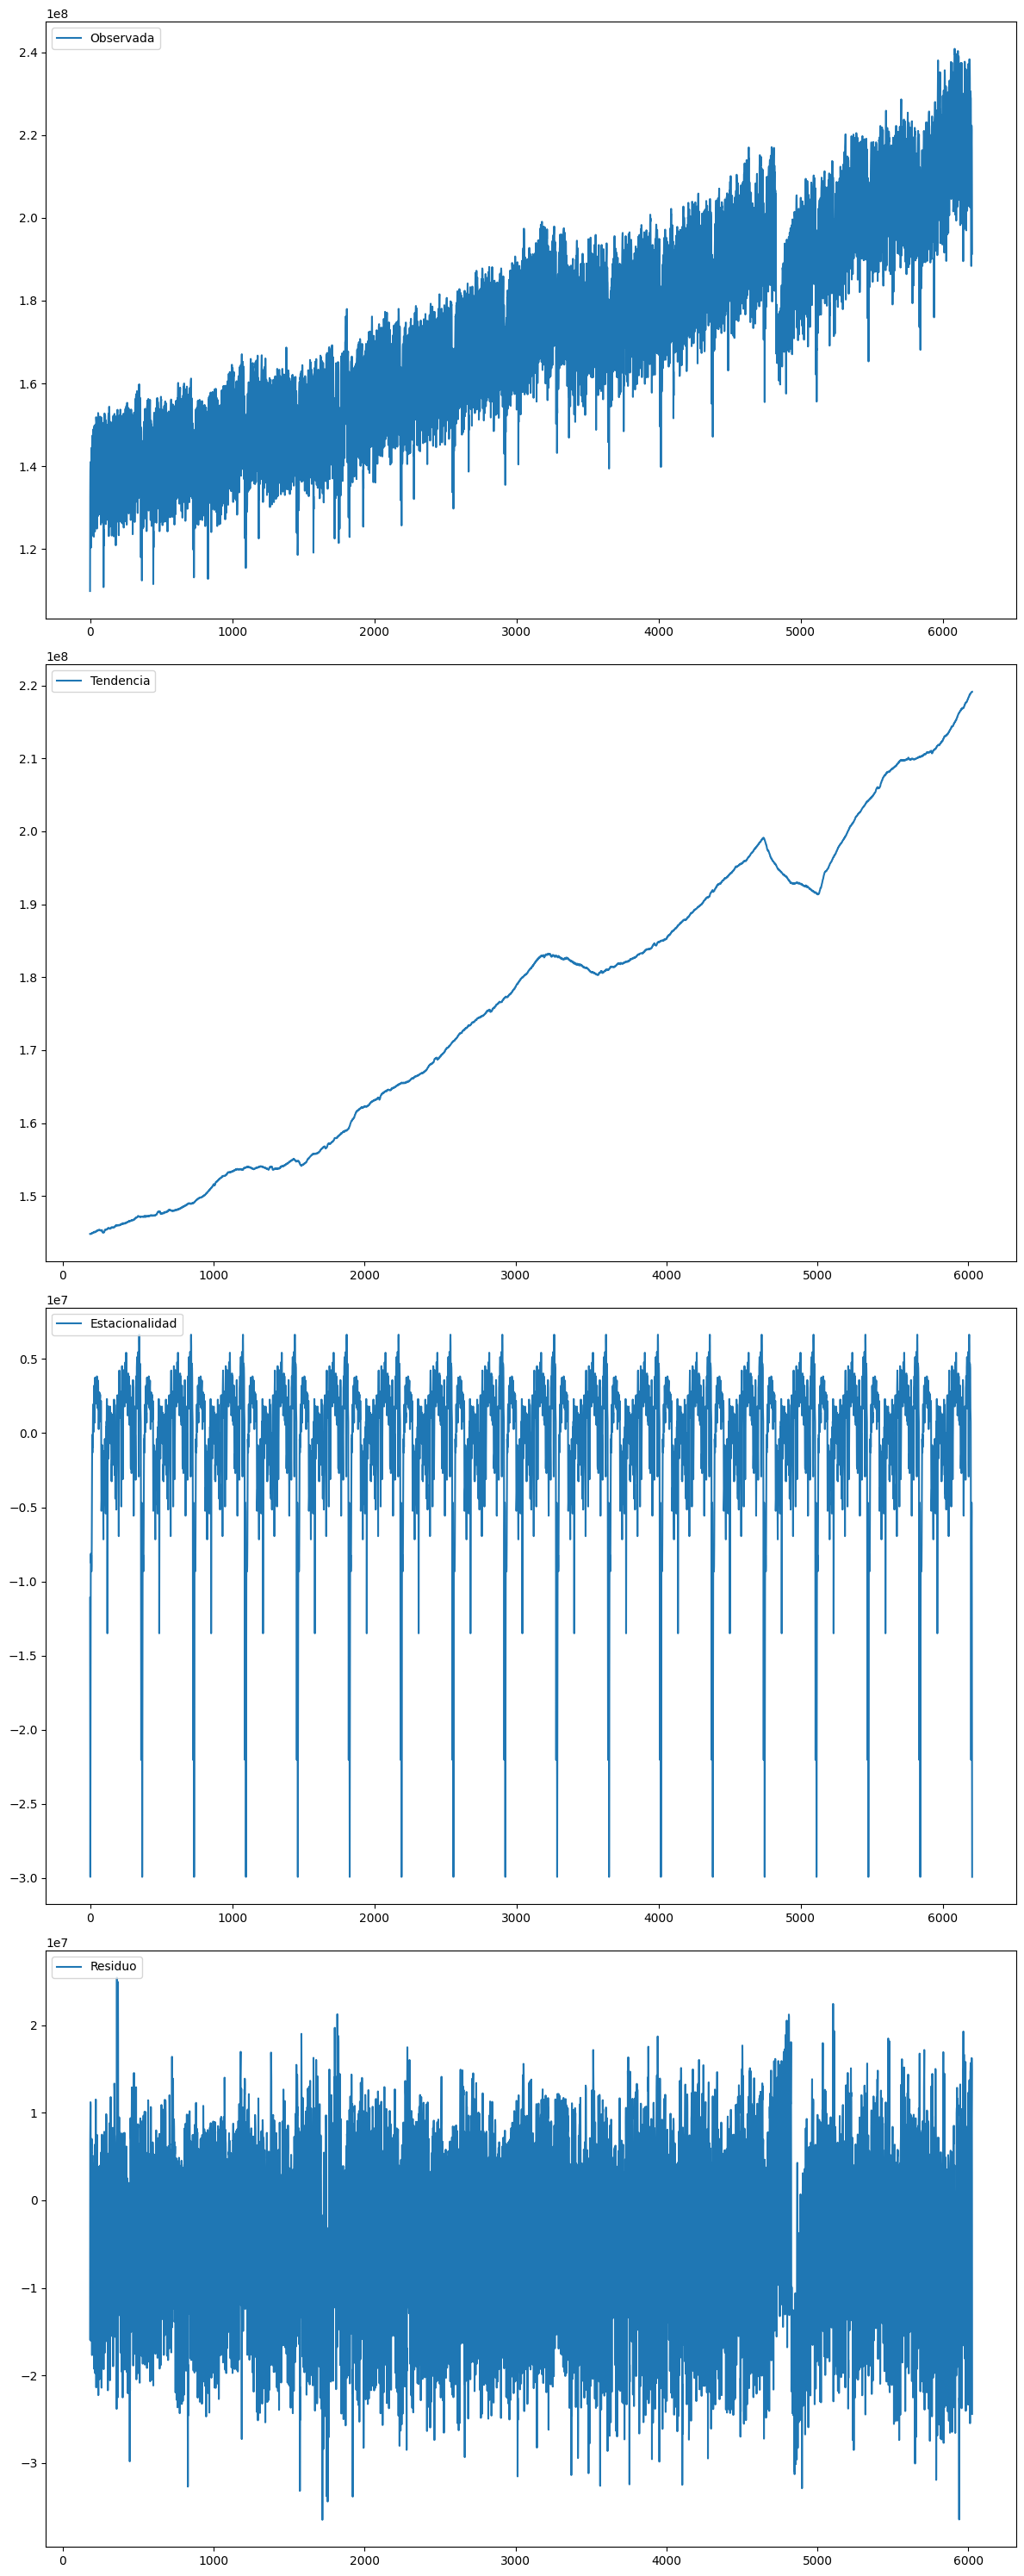

In [54]:
# Descomponer la serie temporal
decomposition = seasonal_decompose(dataset['Demanda Energia SIN kWh'], model='additive', period=365)

# Visualizar los componentes
plt.figure(figsize=(12, 30))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observada')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

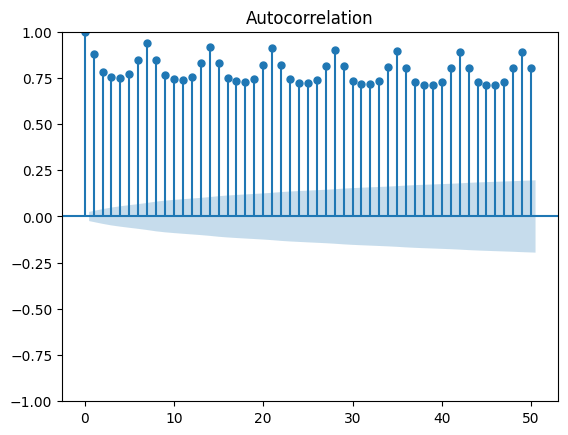

In [55]:
# Autocorrelación (ACF)
plt.figure(figsize=(10, 6))
plot_acf(energia['Demanda Energia SIN kWh'].dropna(), lags=50)
plt.show()

<Figure size 1000x600 with 0 Axes>

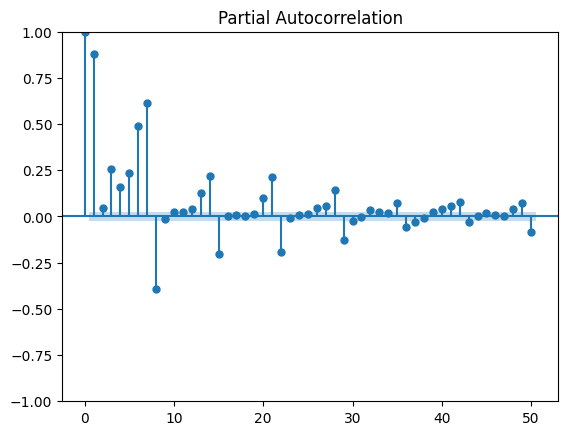

In [56]:
# Autocorrelación parcial (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(dataset['Demanda Energia SIN kWh'].dropna(), lags=50)
plt.show()

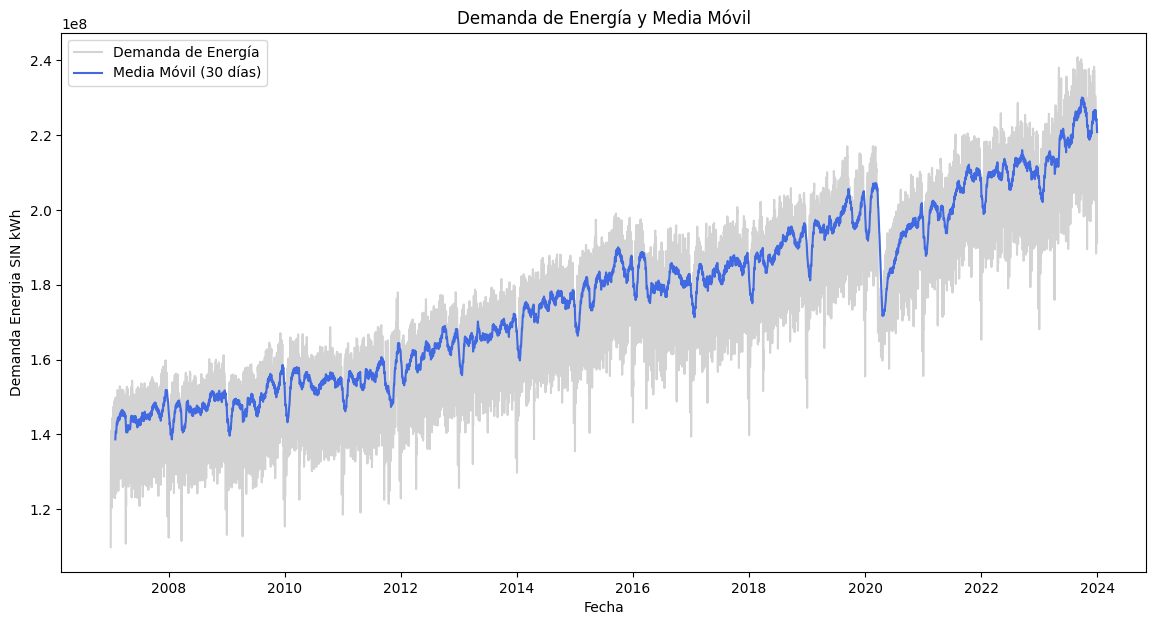

In [57]:
# Media móvil
dataset['Media_Movil'] = dataset['Demanda Energia SIN kWh'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(dataset['Fecha'], dataset['Demanda Energia SIN kWh'], label='Demanda de Energía', color='lightgrey')
plt.plot(dataset['Fecha'], dataset['Media_Movil'], label='Media Móvil (30 días)', color='royalblue')
plt.title('Demanda de Energía y Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Demanda Energia SIN kWh')
plt.legend()
plt.show()